In [1]:
import os
import sys
module_path = os.path.abspath('.')
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import utils.io as io
from utils.rle import encode, decode
from grit_paths import GritPaths
import utils.vis as vis
from utils.vis import grit_viz, GritIO, GritIOType

In [3]:
sample = io.load_json_object('data/examples/samples.json')['segmentation'][0]
display(sample)

{'gt': {'bboxes': None,
  'masks': [{'counts': 'eib:2Xe02N2N1O3M3L7K2L6L1K9J2N2L4M2N4L2M4N1G9N2G9M3K5G_Mf]Oc2Wb0901O100L4J6N2J6O1O1O10000O100M3N2N2M3O1O100000000000000N200O1N2O10000000000001O1O0000000000000001O0000000000000001OO1O10000001YM\\_Oe0d`0VOQ_OaN>Y2a`0oNl_Om0T`0QOP@m0P`0QOT@m0m?oNW@P1h?oN[@P1e?nN^@Q1c?lNa@R1_?mNb@S1^?lNg@P1Y?oNh@Q1W?oNk@P1U?mNQAP1o>nNUAo0l>oN[Aj0g>VO[Ah0d>VOaAc0e>[O`A=e>@jAOZ>1gAL[>3_3O101O001N1010O0000O1001O01OnbU8',
    'size': [683, 1024]}],
  'out_image_name': None,
  'points': None,
  'words': None},
 'input': {'image_path': 'examples/images/segmentation_0.png',
  'output_options': None,
  'task_bbox': None,
  'task_query': 'watch'},
 'src': 'open_images_seg'}

In [4]:
masks = [decode(rle) for rle in sample['gt']['masks']]

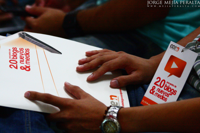

In [5]:
image_pth = os.path.join('data',sample['input']['image_path'])
img = vis.read_image(image_pth)
vis.display_thumbnail(img,max_size=(200,200))

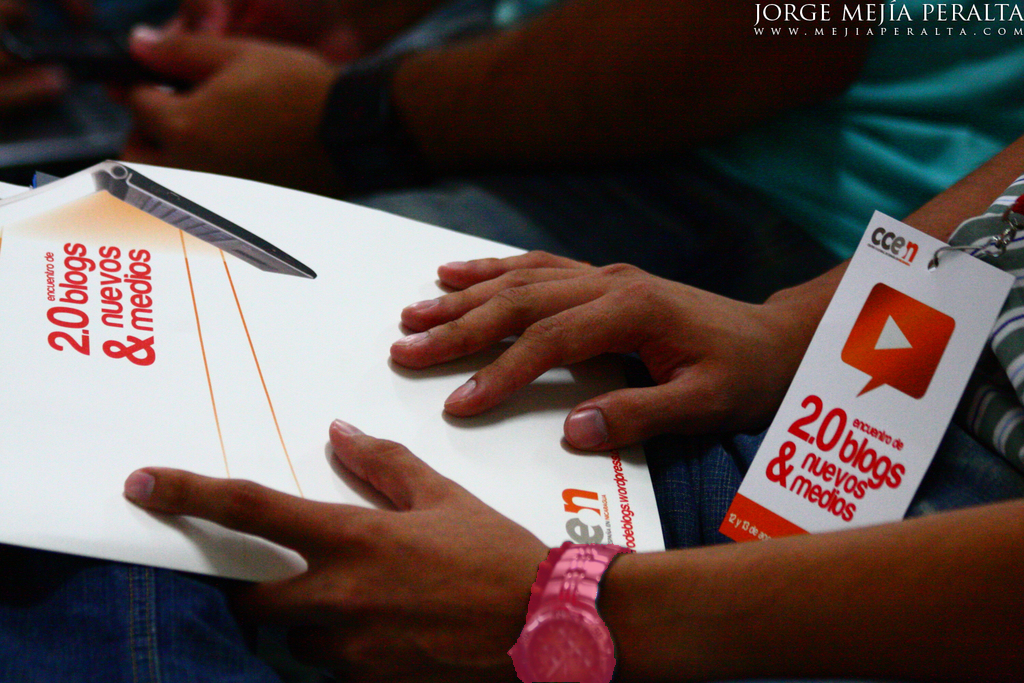

{'Query': 'watch'}

In [6]:
img_,text = grit_viz(img, GritIO(text=sample['input']['task_query']), GritIOType.INPUT)
img_,text = grit_viz(img_, GritIO(segs=masks), GritIOType.GT, text)
img_,vis.display_image(img_)
display(text)

Updating GritIOType changes visualization behavior - eg. for changing mask/box colors

In [7]:
GritIOType.GT.seg_colors = [(0,255,0)]*100

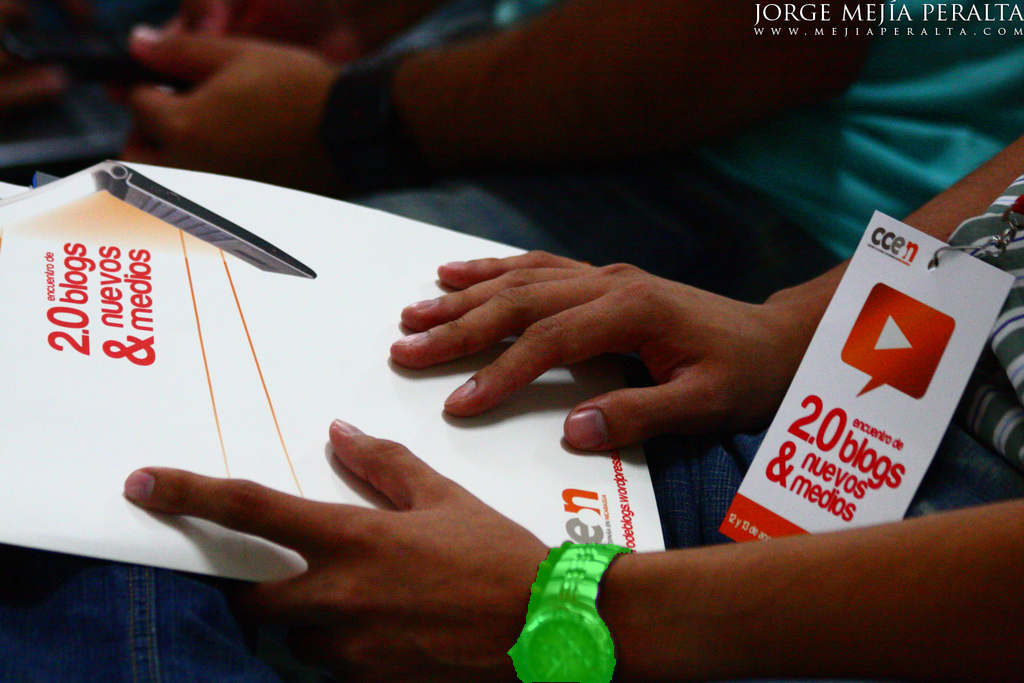

{}

In [8]:
img_,text = grit_viz(img, GritIO(segs=masks), GritIOType.GT)
vis.display_image(img_)
display(text)